# TON_IoT Network Dataset - Exploratory Data Analysis

Notebook ini menjalankan analisis EDA komprehensif pada TON_IoT dataset menggunakan class `TONIoTExplorer`.

**Dataset**: train_test_network.csv

**Tujuan**: Memahami karakteristik data mentah sebelum preprocessing

**Fitur Baru**:
- Display HTML untuk output yang lebih rapi
- Visualisasi lengkap (distribusi, scatter plots dengan warna per attack type)
- Correlation heatmap lengkap (kanan kiri atas bawah)
- Export ke Markdown

In [15]:
# Import EDA class dari file Python (versi 2 dengan display)
from EDA_v2 import TONIoTExplorer

# Untuk auto-reload jika ada perubahan pada file EDA_v2.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Initialize Explorer dengan Dataset

In [16]:
# Inisialisasi dengan path ke dataset
# Sesuaikan path jika dataset berada di lokasi berbeda
explorer = TONIoTExplorer('/home/elnoersan/Skripsi/Paper/NotebookTODO/train_test_network.csv')

TON_IoT Network Dataset - Exploratory Data Analysis

Memuat dataset mentah (tanpa modifikasi)...

Dataset berhasil dimuat dalam 0.37 detik
Shape: 211,043 baris x 44 kolom

Dataset berhasil dimuat dalam 0.37 detik
Shape: 211,043 baris x 44 kolom



## 3. Analisis 1: Basic Information

Menampilkan informasi dasar tentang dataset termasuk:
- Tipe data kolom
- Ukuran memory
- Statistik dasar
- Sample data

In [17]:
explorer.basic_info()

,Data Type,Count
0,object,27
1,int64,16
2,float64,1


,Metric,Value
0,Total Records,"211,043"
1,Total Columns,44
2,Duplicate Rows,"20,569"
3,Memory Usage (MB),306.76


,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


## 4. Analisis 2: Target Distribution

Menganalisis distribusi dari:
- Label (Binary: Normal vs Attack)
- Type (Multi-class: Jenis-jenis serangan)

,Label,Count,Percentage
0,Attack,161043,76.31%
1,Normal,50000,23.69%


,Attack Type,Count,Percentage
0,normal,50000,23.69%
1,backdoor,20000,9.48%
2,ddos,20000,9.48%
3,dos,20000,9.48%
4,injection,20000,9.48%
5,password,20000,9.48%
6,scanning,20000,9.48%
7,ransomware,20000,9.48%
8,xss,20000,9.48%
9,mitm,1043,0.49%


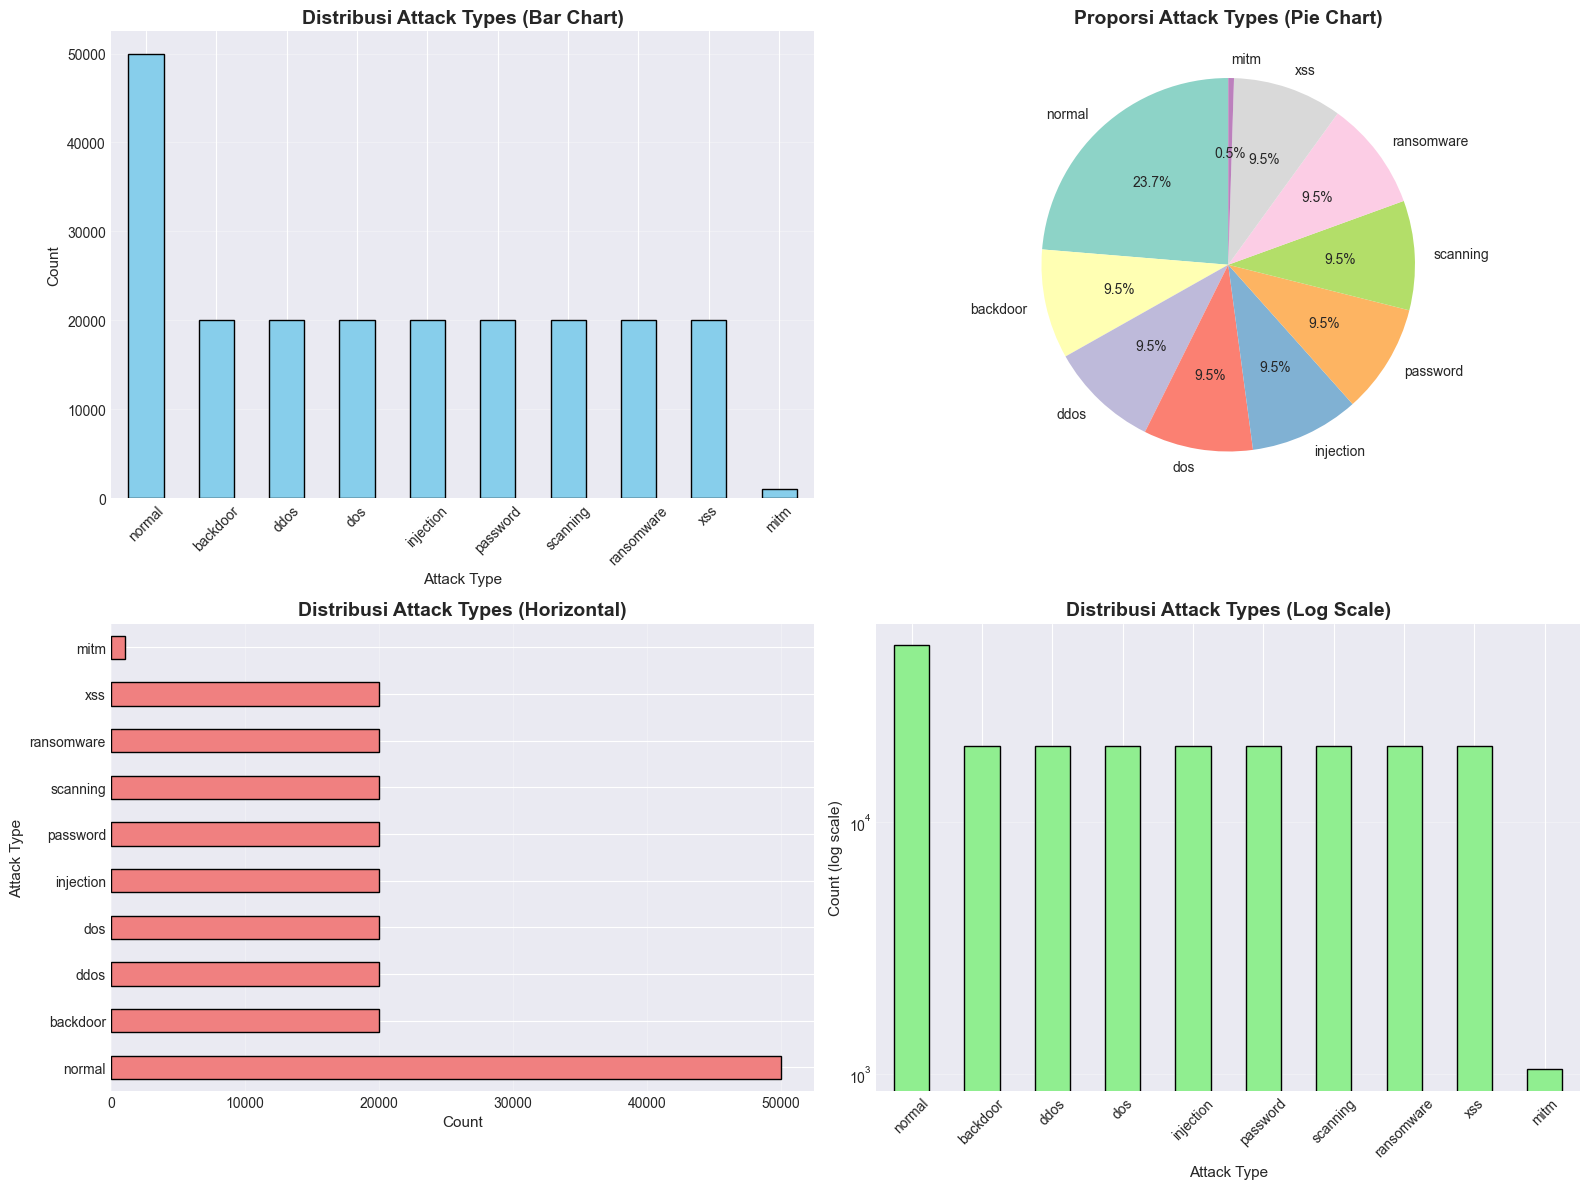

In [18]:
explorer.analyze_target_distribution()

## 5. Analisis 3: Missing Values

Menganalisis missing values termasuk:
- NaN values
- Placeholder '-' values
- Total missing per kolom

,Column,NaN_Count,NaN_Pct,Dash_Count,Dash_Pct,Total_Missing,Total_Missing_Pct
27,ssl_subject,0,0.00%,211032,99.99%,211032,99.99%
28,ssl_issuer,0,0.00%,211032,99.99%,211032,99.99%
37,http_orig_mime_types,0,0.00%,211027,99.99%,211027,99.99%
40,weird_addl,0,0.00%,210886,99.93%,210886,99.93%
38,http_resp_mime_types,0,0.00%,210839,99.90%,210839,99.90%
31,http_uri,0,0.00%,210756,99.86%,210756,99.86%
30,http_method,0,0.00%,210756,99.86%,210756,99.86%
36,http_user_agent,0,0.00%,210756,99.86%,210756,99.86%
32,http_version,0,0.00%,210745,99.86%,210745,99.86%
29,http_trans_depth,0,0.00%,210740,99.86%,210740,99.86%


,Metric,Value
0,Kolom dengan missing,22 dari 44
1,Kolom dengan >50% missing,22
2,Kolom dengan >90% missing,16


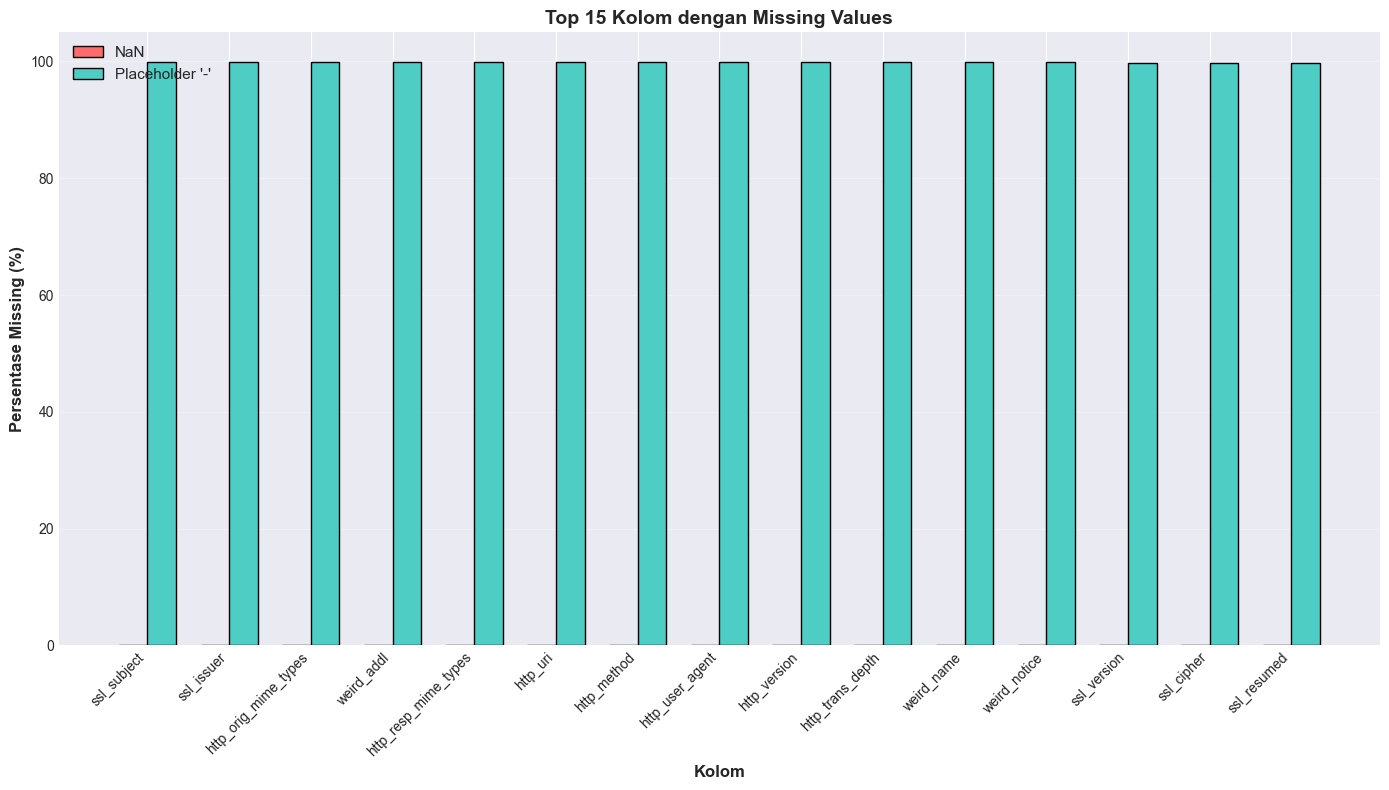

In [19]:
explorer.analyze_missing_values()

## 6. Analisis 4: Protocol-Specific Features ⚠️ CRITICAL!

**PENTING**: Analisis ini menjelaskan mengapa banyak missing values di TON_IoT dataset.

Menganalisis fitur yang spesifik untuk protokol tertentu:
- DNS features
- HTTP features  
- SSL/TLS features

Missing values pada protocol-specific features adalah **NORMAL** karena not applicable!

In [20]:
explorer.analyze_protocol_specific_features()  # CRITICAL!

,Protocol,Count,Percentage
0,tcp,168747,79.96%
1,udp,42015,19.91%
2,icmp,281,0.13%


,Service,Count,Percentage
0,-,132032,62.56%
1,dns,39446,18.69%
2,http,37029,17.55%
3,ftp,1065,0.50%
4,ssl,1025,0.49%
5,gssapi,184,0.09%
6,dce_rpc,136,0.06%
7,smb,108,0.05%
8,smb;gssapi,18,0.01%


,Metric,Count,Percentage
0,Records dengan DNS data,"211,043",100.00%
1,Records tanpa DNS data,0,0.00%


,Metric,Count,Percentage
0,Records dengan HTTP data,"211,043",100.00%
1,Records tanpa HTTP data,0,0.00%


,Method,Count
0,-,210756
1,GET,266
2,POST,17
3,HEAD,4


,Metric,Count,Percentage
0,Records dengan SSL data,"211,043",100.00%
1,Records tanpa SSL data,0,0.00%


## 7. Analisis 5: Numerical Features

Menganalisis fitur numerik:
- Statistik deskriptif
- Deteksi outliers
- Distribusi nilai

,Mean,Std,Min,Max,Zeros (%)
duration,7.70,564.14,0.0,9.351693e+04,28.44
src_bytes,258113.56,17094901.25,0.0,3.890855e+09,65.46
dst_bytes,258804.57,18025629.25,0.0,3.913853e+09,70.55
missed_bytes,34432.34,5261620.90,0.0,1.854527e+09,98.60
src_pkts,9.60,91.78,0.0,2.462300e+04,8.10
dst_pkts,3.85,330.71,0.0,1.219420e+05,39.44
src_ip_bytes,776.08,22297.03,0.0,6.522626e+06,8.10
dst_ip_bytes,1584.69,190179.52,0.0,8.639552e+07,39.44
src_port,38646.52,19307.27,1.0,6.552800e+04,0.00
dst_port,3495.15,10191.62,0.0,6.546700e+04,0.02


,Feature,Outliers,Percentage
0,duration,"47,670",22.59%
1,src_bytes,"12,426",5.89%
2,dst_bytes,"43,158",20.45%
3,missed_bytes,"2,945",1.40%
4,src_pkts,"15,412",7.30%


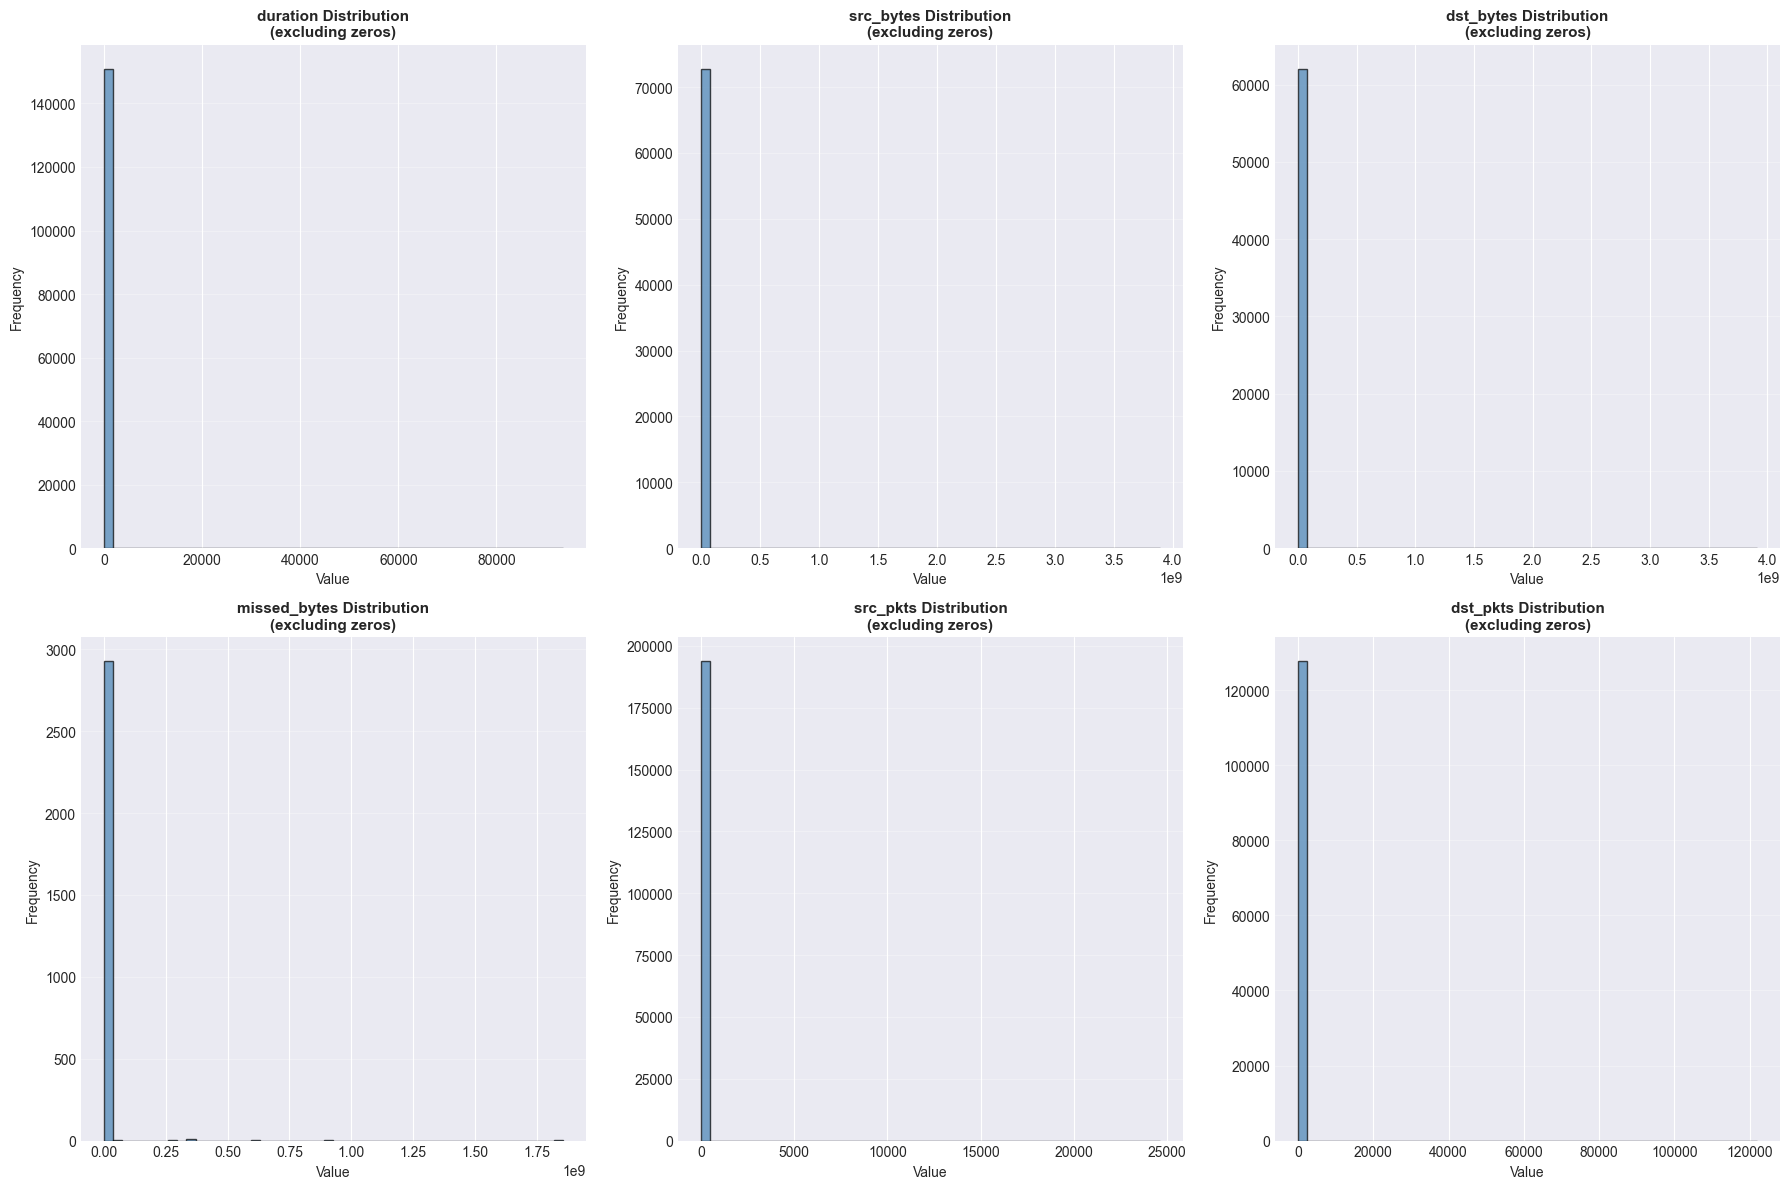

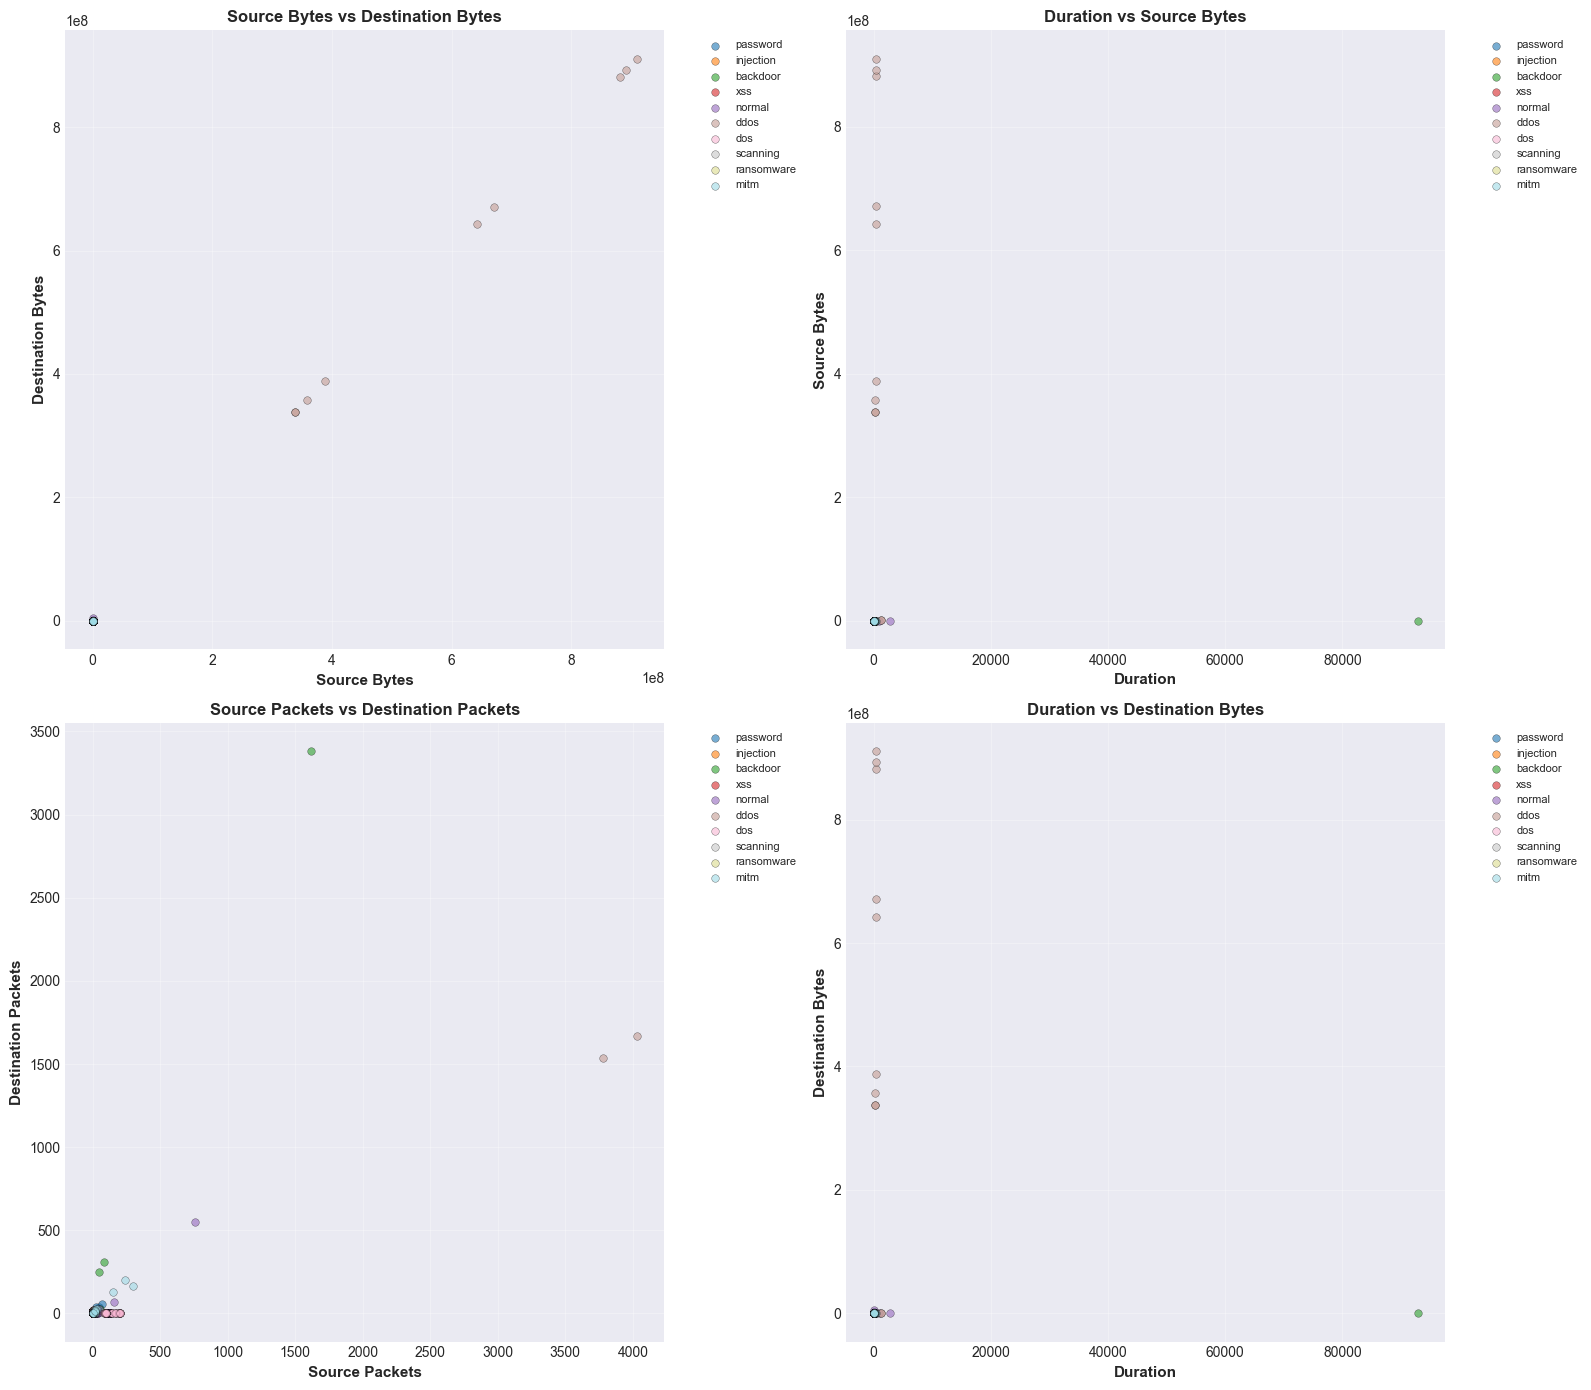

In [21]:
explorer.analyze_numerical_features()

## 8. Analisis 6: Categorical Features

Menganalisis fitur kategorikal:
- Unique values
- Cardinality
- Distribusi nilai

In [22]:
explorer.analyze_categorical_features()

,Value,Count,Percentage
0,tcp,168747,79.96%
1,udp,42015,19.91%
2,icmp,281,0.13%


,Value,Count,Percentage
0,-,132032,62.56%
1,dns,39446,18.69%
2,http,37029,17.55%
3,ftp,1065,0.50%
4,ssl,1025,0.49%
5,gssapi,184,0.09%
6,dce_rpc,136,0.06%
7,smb,108,0.05%
8,smb;gssapi,18,0.01%


,Value,Count,Percentage
0,S0,51937,24.61%
1,SF,50210,23.79%
2,REJ,44852,21.25%
3,OTH,23332,11.06%
4,SH,12014,5.69%
5,S1,10771,5.10%
6,S3,6557,3.11%
7,SHR,5629,2.67%
8,RSTR,1989,0.94%
9,RSTRH,1690,0.80%


,Feature,Unique Values,Cardinality
0,proto,3,Low
1,service,9,Low
2,conn_state,13,Medium
3,dns_query,726,High
4,dns_AA,3,Low
5,dns_RD,3,Low
6,dns_RA,3,Low
7,dns_rejected,3,Low
8,ssl_version,4,Low
9,ssl_cipher,6,Low


## 9. Analisis 7: Correlations

Menganalisis korelasi antar fitur numerik:
- Correlation matrix
- Highly correlated features
- Heatmap visualization

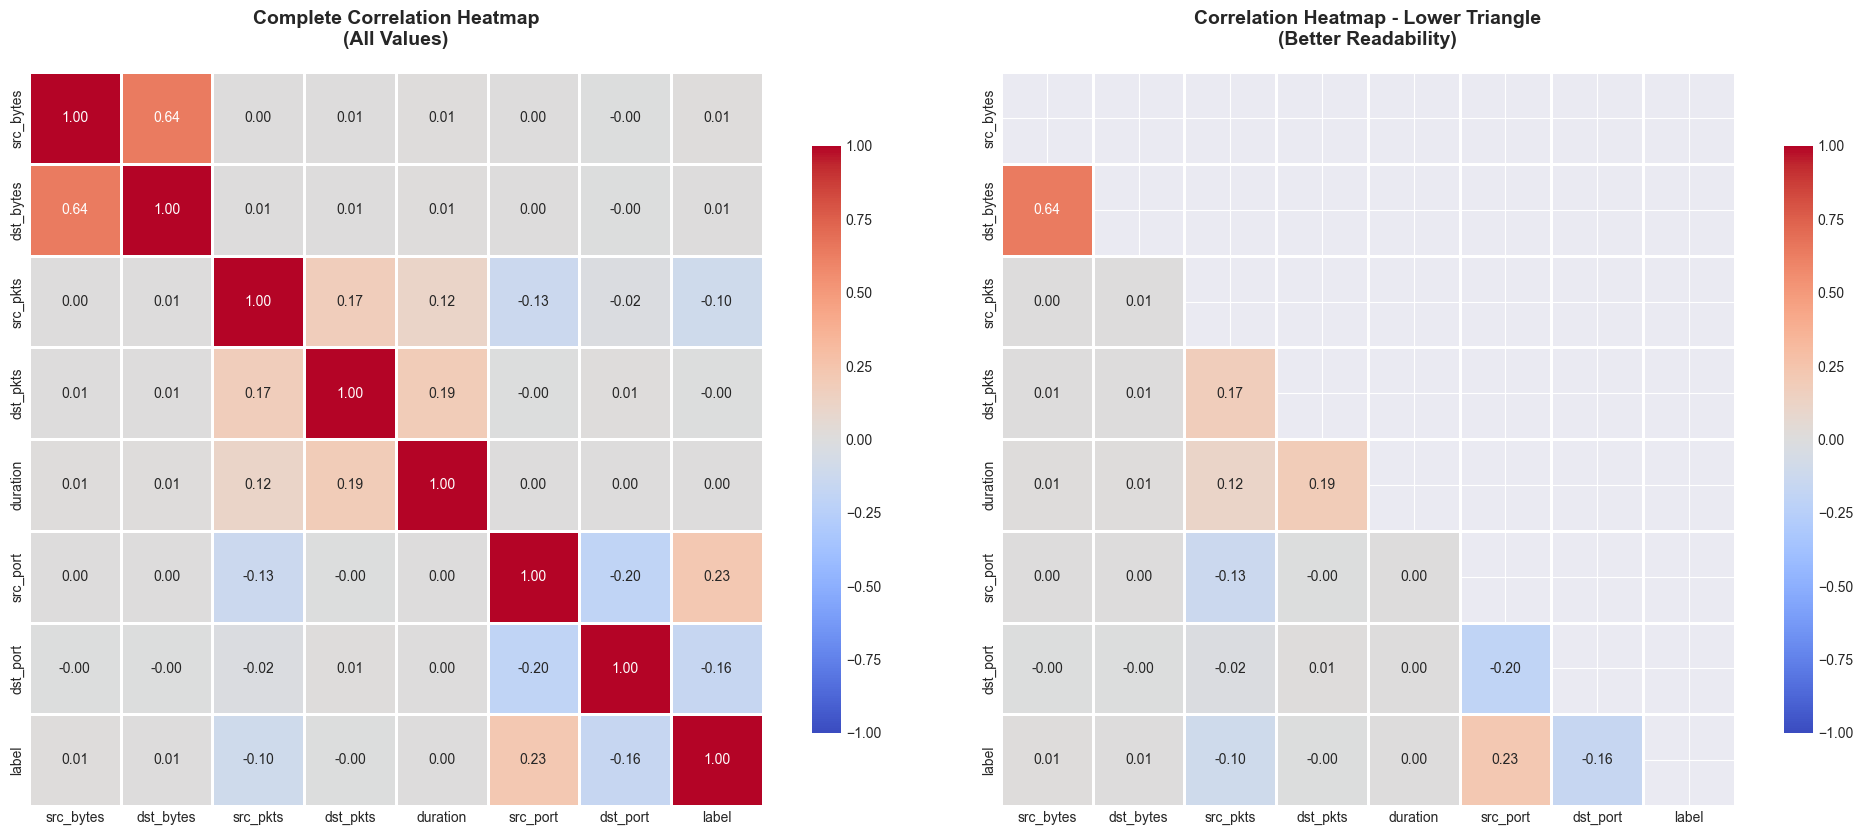

In [23]:
explorer.analyze_correlations()

## 10. Analisis 8: Attack Patterns

Menganalisis pola karakteristik setiap jenis serangan

In [24]:
explorer.analyze_attack_patterns()

,Attack Type,Sample Size,src_bytes_mean,src_bytes_median,dst_bytes_mean,dst_bytes_median,duration_mean,duration_median
0,backdoor,20000,173.17,0.00,794.41,0.00,37.02,0.00
1,ddos,20000,2383954.40,0.00,2498872.09,0.00,17.08,0.00
2,dos,20000,21.19,0.00,4613.17,0.00,0.49,0.00
3,injection,20000,194818.36,256.00,200242.08,2153.00,1.45,0.25
4,mitm,1043,14528.93,94.00,4657.85,436.00,28.05,0.06
5,normal,50000,2127.62,0.00,9767.99,0.00,3.99,0.00
6,password,20000,127.49,155.00,1222.27,651.00,0.71,0.00
7,ransomware,20000,0.00,0.00,0.00,0.00,0.00,0.00
8,scanning,20000,4.05,0.00,27.53,0.00,0.31,0.00
9,xss,20000,138477.66,0.00,510.22,0.00,12.76,0.00


## 11. Generate Summary Report

Menghasilkan ringkasan lengkap dari semua analisis

In [25]:
explorer.generate_summary_report()

## 12. Visualisasi yang Dihasilkan

Notebook ini menghasilkan beberapa file visualisasi:

1. `toniot_target_distribution.png` - Distribusi attack types
2. `toniot_missing_values.png` - Missing values analysis
3. `toniot_numerical_distributions.png` - Distribusi fitur numerik
4. `toniot_correlation_heatmap.png` - Correlation heatmap

File-file ini akan tersimpan di directory yang sama dengan notebook ini.

## 13. Kesimpulan dan Next Steps

Setelah menjalankan EDA ini, Anda akan memahami:

✅ Karakteristik dataset TON_IoT

✅ Distribusi attack types dan class imbalance

✅ Mengapa ada banyak missing values (protocol-specific features!)

✅ Outliers dan distribusi data

✅ Korelasi antar features

✅ Pola karakteristik setiap attack type

**Next Steps**: Gunakan insights dari EDA ini untuk:
1. Menentukan strategi preprocessing yang tepat
2. Feature selection
3. Handling imbalanced data
4. Model selection

## 14. Export Laporan EDA ke Markdown

Export semua hasil analisis ke file markdown untuk dokumentasi.

In [26]:
# Export semua hasil analisis ke file markdown
explorer.export_to_markdown('TON_IoT_EDA_Report.md')


Laporan berhasil disimpan: TON_IoT_EDA_Report.md


'TON_IoT_EDA_Report.md'